In [1]:
#from oreilly SVM tutorial by jake vanderplas (from pycon2015 sklearn workshop)

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns; sns.set()

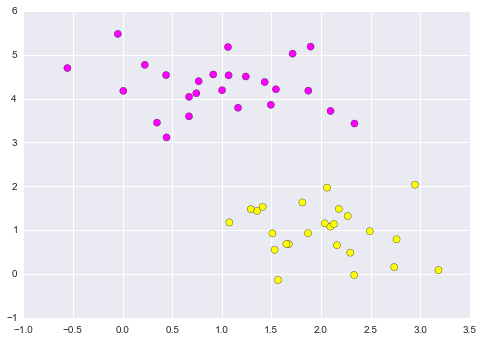

In [3]:
from sklearn.datasets.samples_generator import make_blobs
X,y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:,0],X[:,1], c=y, s=50, cmap='spring')

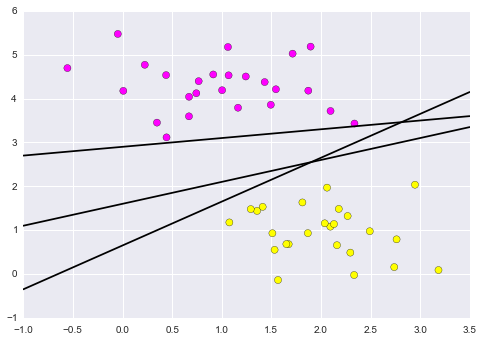

In [4]:
xfit = np.linspace(-1,3.5)
plt.scatter(X[:,0],X[:,1], c=y, s=50, cmap='spring')

for m,b in [(1,0.65), (0.5,1.6), (0.2,2.9)]:
    plt.plot(xfit, m*xfit + b, '-k')

    plt.xlim(-1,3.5)

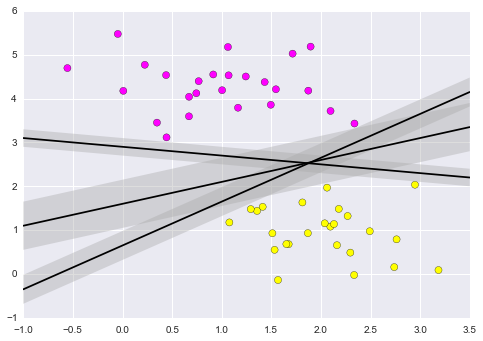

In [7]:
xfit = np.linspace(-1,3.5)
plt.scatter(X[:,0],X[:,1], c=y, s=50, cmap='spring')

for m,b,d in [(1,0.65,0.33),(0.5,1.6,0.55),(-0.2,2.9,0.2)]:
    yfit = m*xfit + b
    plt.plot(xfit,yfit, '-k')
    plt.fill_between(xfit,yfit-d, yfit+d,edgecolor='none', color='#AAAAAA', alpha=0.4)

    plt.xlim(-1,3.5)

In [8]:
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [13]:
def plot_svc_decision_function(clf, ax=None):
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1],30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1],30)
    Y,X = np.meshgrid(y,x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i,j] = clf.decision_function([xi,yj])
            
    ax.contour(X,Y,P, color='k', levels=[-1,0,1], linestyles=['--','-','--'])

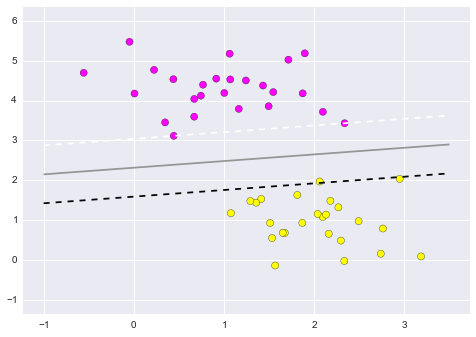

In [14]:
plt.scatter(X[:,0],X[:,1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf);

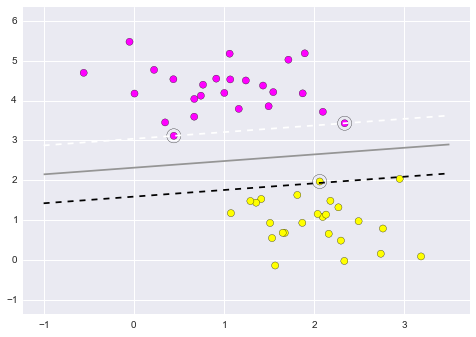

In [17]:
#the dashed lines are the 'support vectors'
plt.scatter(X[:,0],X[:,1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1], s=200, facecolors='none')

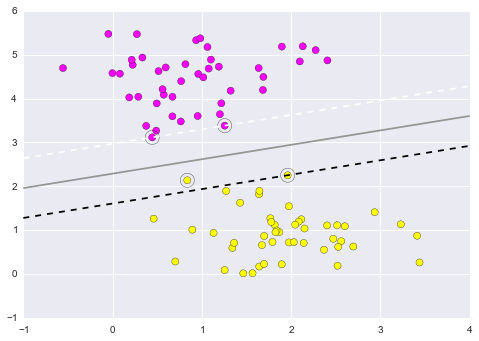

In [18]:
from IPython.html.widgets import interact

def plot_svm(N=10):
    X,y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.60)
    
    X=X[:N]
    y = y[:N]
    clf = SVC(kernel='linear')
    clf.fit(X,y)
    plt.scatter(X[:,0],X[:,1], c=y, s=50, cmap='spring')
    plt.xlim(-1,4)
    plt.ylim(-1,6)
    plot_svc_decision_function(clf,plt.gca())
    plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=200, facecolors='none')
    
interact(plot_svm, N=[10,200], kernel='linear')

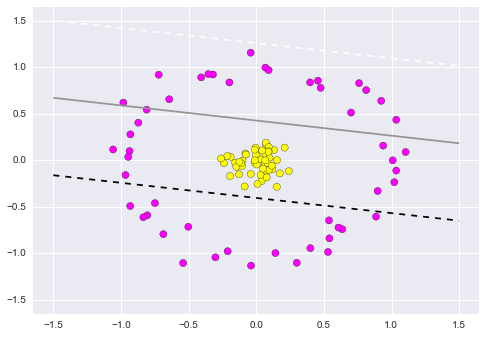

In [19]:
#use kernels when data are not linearly separable
from sklearn.datasets.samples_generator import make_circles
X,y = make_circles(100, factor=0.1, noise=0.1)

clf = SVC(kernel='linear').fit(X,y)

plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf)

In [20]:
#use a radial basis function
r = np.exp(-(X[:,0] **2 + X[:,1]**2))

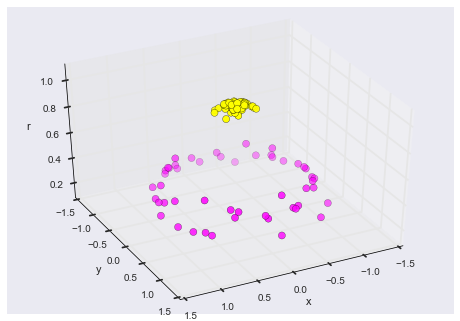

In [21]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30):
    ax=plt.subplot(projection='3d')
    ax.scatter3D(X[:,0],X[:,1],r,c=y,s=50, cmap='spring')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')
    
interact(plot_3D, elev=[-90,90], azip=(-180,180))
  

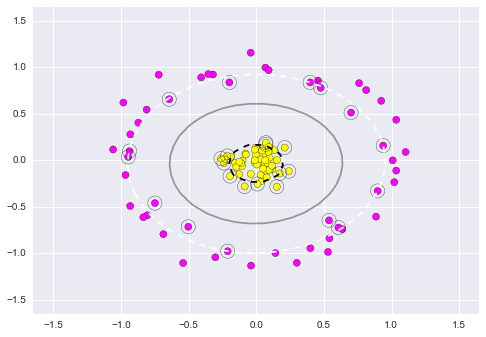

In [23]:
#easy to see that adding a dimension makes it trivial to separate linearly
clf = SVC(kernel='rbf')
clf.fit(X,y)

plt.scatter(X[:,0],X[:,1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=200, facecolors='none')